# Linear Regression
Implementation of Linear Regression and Pocket Algorithm using NumPy. And a comparison of their accuracy on the noisy data sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1
- Generate a training data set of size 100 as directed by Exercise 3.2 of LFD. 
- Generate a test set of size 1000 of the same nature.

In [2]:
# Let's the target function be a random linear function of my choice
# 0.1x0 + 0.8x1 + 0.4x2, where x0 = 1

target_weights = np.array([0.1, 0.8, 0.4])

# This function will be used to plot the target function
def target_function(x1):
    x2 = -(target_weights[0]*1 + target_weights[1]*x1)/target_weights[2]
    return x2

# This function will be used to calculate labels, and distinguish positive and negative points
def target_function_activate(x):
    if np.dot(target_weights, x) < 0:
        return -1
    else:
        return 1

In [3]:
# Generate a random data set of size size_X
def generate_dataset(size_X):
    X = np.random.uniform(low=-1.0, high=1.0, size=(size_X,3))
    for x in X:
        x[0] = 1.0
    return X

# Distinguish between positive and negative examples, and identify labels        
def label_data(X):
    X_pos, X_neg, Y_pos, Y_neg, labels = [],[],[],[],[]
    for x in X:
        if target_function_activate(x) == 1:
            X_pos.append(x[1])
            Y_pos.append(x[2])
        else:
            X_neg.append(x[1])
            Y_neg.append(x[2])
        labels.append(target_function_activate(x))
    return X_pos, X_neg, Y_pos, Y_neg, labels
 
# Add num_noise noise points to data set X
def add_noise(num_noise, X, X_pos, X_neg, Y_pos, Y_neg, labels):
    count = 0
    for i, x in enumerate(X):
        if count == num_noise:
            break
        if target_function_activate(x) == 1:
            X_pos.remove(x[1])
            Y_pos.remove(x[2])
            X_neg.append(x[1])
            Y_neg.append(x[2])
            labels[i] = -1
            count += 1
        else:
            X_neg.remove(x[1])
            Y_neg.remove(x[2])
            X_pos.append(x[1])
            Y_pos.append(x[2])
            labels[i] = 1
            count += 1
    return X_pos, X_neg, Y_pos, Y_neg, labels

# Plot the data set X
def plot_data(X_pos, X_neg, Y_pos, Y_neg):
    plt.rcParams["figure.figsize"] = (9,6)

    # Plot the target function
    plt.plot([-1.0, 1.0], [target_function(i) for i in [-1.0, 1.0]], 'g', label = 'target function')

    # Plot the X data set's points 
    plt.plot(X_pos, Y_pos, 'bo', label = 'positive examples')
    plt.plot(X_neg, Y_neg, 'ro', label = 'negative examples')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

### Training Data Set of Size 100 with 5 Noise Points
- You can manage the number of noise by changing the first parameter of 'add_noise()' function.
- You can manage the size of the data set by changing the parameter of 'generate_dataset()' function

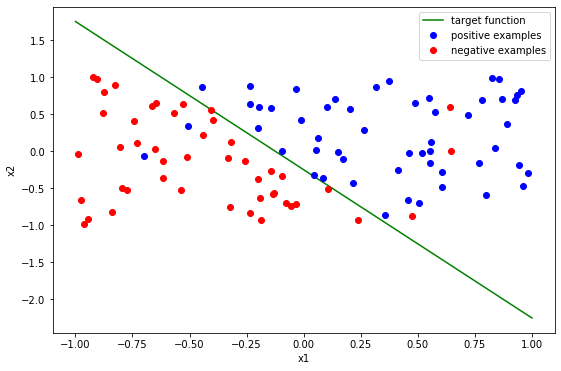

In [4]:
# Data set X_train of size 100

X_train = generate_dataset(100)

X_trainpos, X_trainneg, Y_trainpos, Y_trainneg, labels_train = label_data(X_train)

X_trainpos, X_trainneg, Y_trainpos, Y_trainneg, labels_train = add_noise(5, X_train, X_trainpos, X_trainneg, 
                                                                         Y_trainpos, Y_trainneg, labels_train)

plot_data(X_trainpos, X_trainneg, Y_trainpos, Y_trainneg)

### Test Data Set of Size 1000 with 50 Noise Points
- You can manage the number of noise by changing the first parameter of 'add_noise' function.
- You can manage the size of the data set by changing the parameter of 'generate_dataset()' function

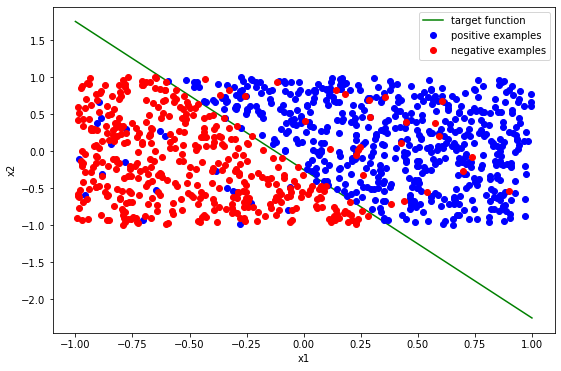

In [5]:
# Data set X_test of size 1000

X_test = generate_dataset(1000)

X_testpos, X_testneg, Y_testpos, Y_testneg, labels_test = label_data(X_test)

X_testpos, X_testneg, Y_testpos, Y_testneg, labels_test = add_noise(50, X_test, X_testpos, X_testneg, 
                                                                         Y_testpos, Y_testneg, labels_test)

plot_data(X_testpos, X_testneg, Y_testpos, Y_testneg)

## Task 2 and Task 3
- Run the pocket algorithm on the training set for T = 1000 to get W_pocket.
- Run the linear regression algorithm to get W_lin. 
- Estimate the performance of the two weight vectors with the test set to get E_test (W_pocket ) and E_test (W_lin ), in terms of the 0/1 loss (classification).

In [6]:
# Initialize weights with zeros
def initialize_weights():
    weights = np.zeros((3,))
    return weights

# Pocket algorithm
def pocket_algo(X, W, Y, T = 1000):
    # X is an input data set
    # Y is labels for corresponding X
    # W is the weights
    # T is a number of iterations
    
    W_pocket = W
    error_old = 0
    for i, x in enumerate(X):
        z = np.dot(W, x)
        if z * Y[i] <= 0:
            error_old += 1
            
    for t in range(T):
        error_new = 0       
        for i, x in enumerate(X):
            z = np.dot(W, x)
            if z * Y[i] <= 0:
                W = W + Y[i]*x 
                break                
        for i, x in enumerate(X): 
            z = np.dot(W, x)
            if z * Y[i] <= 0:
                error_new += 1        
        if error_new < error_old:
            W_pocket = W
            error_old = error_new
    return W_pocket

# Linear Regression
def lin_regression(X, Y):
    X_pseudo = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T)
    W_lin = np.dot(X_pseudo, Y)
    return W_lin

# Calculate the error
def calculate_error(X, W, Y):
    error = 0
    for i, x in enumerate(X):
        z = np.dot(W, x)
        if z * Y[i] <= 0:
            error += 1
    return error/len(X)

### Pocket Algorithm Error
- Get the W_pocket by running the 'pocket_algo()' function on X_train
- Calculate the error_pocket by running the 'calculate_error()' function on X_test and W_pocket

In [7]:
W_pocket = pocket_algo(X=X_train, W=initialize_weights(), Y=labels_train)
error_pocket = calculate_error(X_test, W_pocket, labels_test)
print(error_pocket)

0.429


### Linear Regression Error
- Get the W_lin by running the 'lin_regression()' function on X_train
- Calculate the error_pocket by running the 'calculate_error()' function on X_test and W_lin

In [8]:
W_lin = lin_regression(X_train, labels_train)
error_lin = calculate_error(X_test, W_lin, labels_test)
print(error_lin)

0.086


## Task 4
- Repeat the experiment (with fresh data sets) 100 times and plot E_test (W_pocket) versus E_test (W_lin) as a scatter plot.

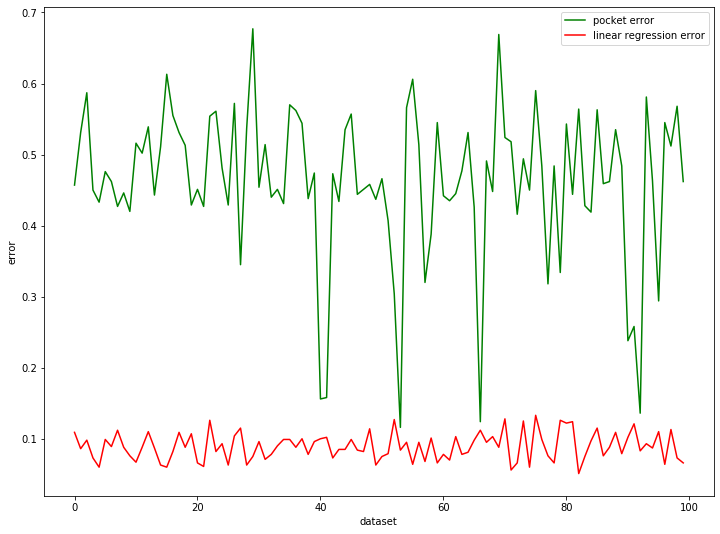

In [9]:
num_experiments = 100
errors_pocket, errors_lin = [], []

for i in range(num_experiments):
    X_train = generate_dataset(100)
    X_trainpos, X_trainneg, Y_trainpos, Y_trainneg, labels_train = label_data(X_train)
    X_trainpos, X_trainneg, Y_trainpos, Y_trainneg, labels_train = add_noise(5, X_train, X_trainpos, X_trainneg, 
                                                                         Y_trainpos, Y_trainneg, labels_train)    
    
    X_test = generate_dataset(1000)
    X_testpos, X_testneg, Y_testpos, Y_testneg, labels_test = label_data(X_test)
    X_testpos, X_testneg, Y_testpos, Y_testneg, labels_test = add_noise(50, X_test, X_testpos, X_testneg, 
                                                                             Y_testpos, Y_testneg, labels_test)
    
    W_pocket = pocket_algo(X=X_train, W=initialize_weights(), Y=labels_train)
    W_lin = lin_regression(X_train, labels_train)
    
    errors_pocket.append(calculate_error(X_test, W_pocket, labels_test))
    errors_lin.append(calculate_error(X_test, W_lin, labels_test))
    
plt.rcParams["figure.figsize"] = (12,9)
plt.plot(range(num_experiments), errors_pocket, 'g', label = 'pocket error')
plt.plot(range(num_experiments), errors_lin, 'r', label = 'linear regression error')
plt.xlabel('dataset')
plt.ylabel('error')
plt.legend()
plt.show()

### Average Error

In [10]:
print('Average Error of the Pocket Algorithm:', np.mean(errors_pocket))
print('Average Error of the Linear Regression', np.mean(errors_lin))

Average Error of the Pocket Algorithm: 0.46146
Average Error of the Linear Regression 0.08924


## Task 5 
- Based on your findings in the previous problem, which algorithm would you recommend to your boss for this data set? Why?

### Summary
It can be clearly seen that the error of the Pocket Algorithm is significantly larger than the error of the Linear Regression. Furthermore, the Linear Regression is more efficient because it uses the normal equation, whereas the Pocket Algorithm uses an iterative approach. Base on these findings, I would recommend the Linear Regression for noisy data sets to my boss.